# Importando as bibliotecas

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Explorando os dados

In [29]:
# lendo o arquivo e passando o parâmetro parse_dates para classificar coluna data como date_time
df_original = pd.read_csv('amazon_prime_titles.csv', parse_dates=['date_added'])

In [30]:
# copiando dataframe para não alterar o original
df_copia = df_original.copy()

In [31]:
# lendo as primeiras 5 linhas do dataset
df_copia.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [32]:
# lendo as ultimas 5 linhas do dataset
df_copia.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaT,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaT,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaT,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaT,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaT,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [33]:
linhas, colunas = df_copia.shape

In [34]:
#Quantidade de valores nulos de acordo com cada coluna
df_copia.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [35]:
# valores nulos em %
df_copia.isnull().sum() / linhas * 100

show_id          0.000000
type             0.000000
title            0.000000
director        21.534961
cast            12.753413
country         93.049235
date_added      98.396773
release_year     0.000000
rating           3.485726
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [36]:
# quantidade de linhas e colunas
df_copia.shape

(9668, 12)

In [37]:
# todas as colunas do dataset
df_copia.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [38]:
#alterando nome das colunas dataset
colunas = ['id', 'tipo', 'titulo', 'diretor', 'elenco', 'pais', 'date_add', 'data_lancamento', 'classificacao', 'duracao', 'categoria', 'descricao']
df_copia.columns = colunas

In [39]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               9668 non-null   object        
 1   tipo             9668 non-null   object        
 2   titulo           9668 non-null   object        
 3   diretor          7586 non-null   object        
 4   elenco           8435 non-null   object        
 5   pais             672 non-null    object        
 6   date_add         155 non-null    datetime64[ns]
 7   data_lancamento  9668 non-null   int64         
 8   classificacao    9331 non-null   object        
 9   duracao          9668 non-null   object        
 10  categoria        9668 non-null   object        
 11  descricao        9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 906.5+ KB


In [40]:
# verificando a quantidade de filmes e séries 
df_copia['tipo'].value_counts()

Movie      7814
TV Show    1854
Name: tipo, dtype: int64

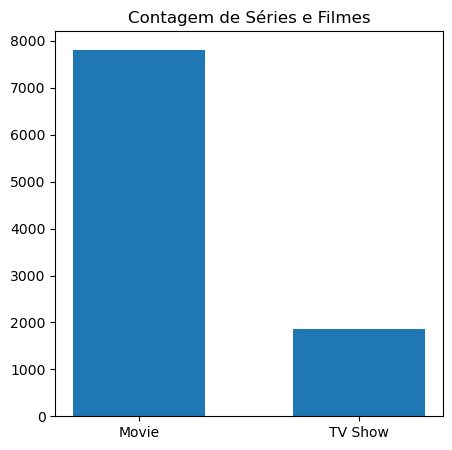

In [41]:
plt.figure(figsize=(5,5))
plt.bar(x=df_copia['tipo'].value_counts().index, height=df_copia['tipo'].value_counts().values, width=0.6)
plt.title('Contagem de Séries e Filmes')
plt.show()

In [42]:
#verificando a quantidade de acordo com a categoria - Tem mais filmes e séries com a categoria Drama
df_copia['categoria'].value_counts()

Drama                                                                            986
Comedy                                                                           536
Drama, Suspense                                                                  399
Comedy, Drama                                                                    377
Animation, Kids                                                                  356
                                                                                ... 
Arts, Entertainment, and Culture, Music Videos and Concerts, Special Interest      1
Arts, Entertainment, and Culture, Comedy, Military and War                         1
Comedy, Faith and Spirituality, Kids                                               1
Arts, Entertainment, and Culture, Fantasy, Kids                                    1
Anime, Comedy, Drama                                                               1
Name: categoria, Length: 518, dtype: int64

In [43]:
# Contagem de filmes e séries categoria Drama
df_categ_drama = df_copia[df_copia['categoria'] == 'Drama']
df_categ_drama['tipo'].value_counts()

Movie      870
TV Show    116
Name: tipo, dtype: int64

In [44]:
df_copia['pais'].value_counts()

United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                               1
Australia, United States, Germany          1
Germany, Austria, United States            1
Italy, Spain                               1
Name: pais, Length: 86, dtype: int64

In [45]:
# Análise de qual maior grupo de filmes de acordo com sua classificação de acordo com EUA
adultos = ['TV-MA', 'R', 'NR']
crianca_adolescente = ['TV-14','TV-PG','PG-13', 'TV-Y7', 'TV-Y', 'PG','TV-G', ]

In [46]:
df_copia['classificacao'].unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [47]:
df_copia.query("classificacao in @crianca_adolescente").shape[0]

1217

In [48]:
df_copia.query("classificacao in @adultos").shape[0]

1310

In [49]:
df_movie = df_copia.query("tipo == 'Movie'")

In [50]:
duracao_min = df_movie['duracao'].str.replace('min','').astype(np.int64)

In [51]:
duracao_min.describe().round(2)

count    7814.00
mean       91.31
std        40.33
min         0.00
25%        75.00
50%        91.00
75%       106.00
max       601.00
Name: duracao, dtype: float64

In [52]:
duracao_min.sort_values(ascending=False)

933     601
3850    550
4087    541
5214    541
1673    541
       ... 
5701      0
5162      0
1381      0
5191      0
8575      0
Name: duracao, Length: 7814, dtype: int64

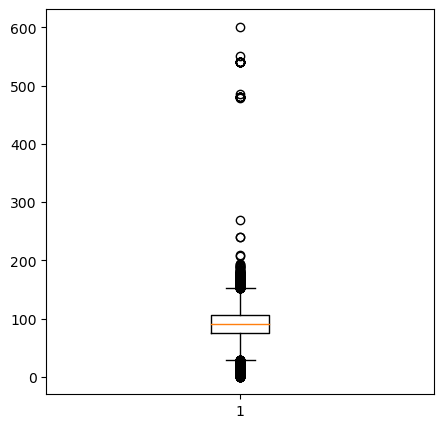

In [60]:
plt.figure(figsize=(5,5))
plt.boxplot(x=duracao_min)
plt.show()

In [65]:
# mediana - Duração dos filmes
duracao_min.median()

91.0

In [53]:
df_copia.loc[[933]]

,id,tipo,titulo,diretor,elenco,pais,date_add,data_lancamento,classificacao,duracao,categoria,descricao
933,s934,Movie,Soothing Surf at Del Norte for Sleep black screen,Mark Knight,NaN,NaN,NaT,2018,ALL,601 min,Special Interest,Black screen reduces the blue-spectrum light w...


In [54]:
df_copia['diretor'].value_counts()

Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
                        ... 
Andrew Traucki             1
Karyn Kusama               1
K. Subash                  1
Robert Cuffley             1
Steve Barker               1
Name: diretor, Length: 5774, dtype: int64